In [59]:
import seaborn as sns
# import pandas as pd
import pandas; print(pandas.__version__)


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# For data processing
import numpy as np
import pandas as pd
import scipy.stats as stats

# For API usage
import requests as r

# For progress bar
from tqdm import tqdm

1.5.3


# KMEANS for budget and vote_average

In [60]:
numerical_data = pd.read_csv('cleaned_1015.csv', usecols = ['BUDGET', 'VOTE_AVERAGE'])
numerical_data

,VOTE_AVERAGE,BUDGET
0,7.6,237000000
1,8.3,356000000
2,7.7,460000000
3,7.9,200000000
4,7.3,245000000
...,...,...
6966,5.5,6000000
6967,6.0,2500000
6968,7.3,350000
6969,7.9,1200000


# Steps 1 and 2 of K-Means were about choosing the number of clusters (k) and selecting random centroids for each cluster. We will pick 3 clusters and then select random observations from the data as the centroids:

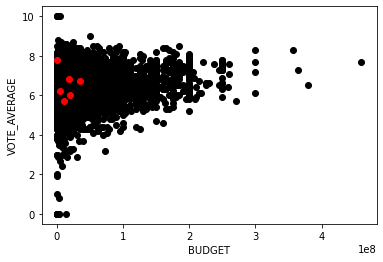

In [61]:
#number of clusters
K=6

# Select random observation as centroids
Centroids = (numerical_data.sample(n=K))
plt.scatter(numerical_data["BUDGET"],numerical_data["VOTE_AVERAGE"],c='black')
plt.scatter(Centroids["BUDGET"],Centroids["VOTE_AVERAGE"],c='red')
plt.xlabel('BUDGET')
plt.ylabel('VOTE_AVERAGE')
plt.show()

# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

We have initially defined the diff as 1, and inside the whole loop, we are calculating this diff as the difference between the centroids in the previous iteration and the current iteration.

When this difference is 0, we stop the training. Let’s now visualize the clusters we have got:

In [62]:
diff = 1
j=0

while(diff!=0):
    XD=numerical_data
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["BUDGET"]-row_d["BUDGET"])**2
            d2=(row_c["VOTE_AVERAGE"]-row_d["VOTE_AVERAGE"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        numerical_data[i]=ED
        i=i+1

    C=[]
    for index,row in numerical_data.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    numerical_data["Cluster"]=C
    Centroids_new = numerical_data.groupby(["Cluster"]).mean()[["VOTE_AVERAGE","BUDGET"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['VOTE_AVERAGE'] - Centroids['VOTE_AVERAGE']).sum() + (Centroids_new['BUDGET'] - Centroids['BUDGET']).sum()
        print(diff.sum())
    Centroids = numerical_data.groupby(["Cluster"]).mean()[["VOTE_AVERAGE","BUDGET"]]

32681189.788570933
29739659.24480076
25992660.457086064
25015330.74878865
19052146.272793915
20939240.972935632
14359120.51043391
11832720.12708225
13025506.714780245
9823932.34138656
8456748.70051308
11789915.954036731
7284429.341659007
8501963.83069414
8280469.901509269
2975222.3345673624
5308830.880415428
2621404.6875168504
4995521.526078789
7286191.526024555
2476924.21250039
2346566.3847457506
6859290.296743225
3716678.763391576
359067.0362203842
3787846.4860977554
1313512.8402333898
220914.88266838013
0.0


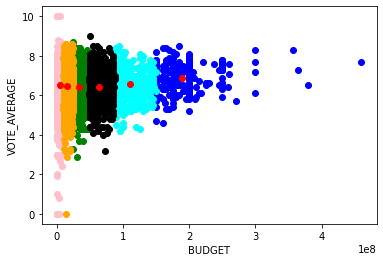

In [63]:

color=['blue','green','cyan', 'pink', 'orange', 'black']
for k in range(K):
    data=numerical_data[numerical_data["Cluster"]==k+1]
    plt.scatter(data["BUDGET"],data["VOTE_AVERAGE"],c=color[k])
plt.scatter(Centroids["BUDGET"],Centroids["VOTE_AVERAGE"],c='red')
plt.xlabel('BUDGET')
plt.ylabel('VOTE_AVERAGE')
plt.show()

KMEANS for revenue and vote_average